In [2]:
import os
import ast
import h5py
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import soundfile as snd
from scipy.fftpack import dct
from scipy.io import savemat
from scipy import signal
from scipy.io import wavfile
import numpy as np
import errno
import scipy
import librosa
import glob

import fnmatch
import shutil
from multiprocessing import pool
import subprocess
import ffmpy
import scipy.io.wavfile as wave


C:\Users\Martyna Dziadosz\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



0it [00:00, ?it/s]

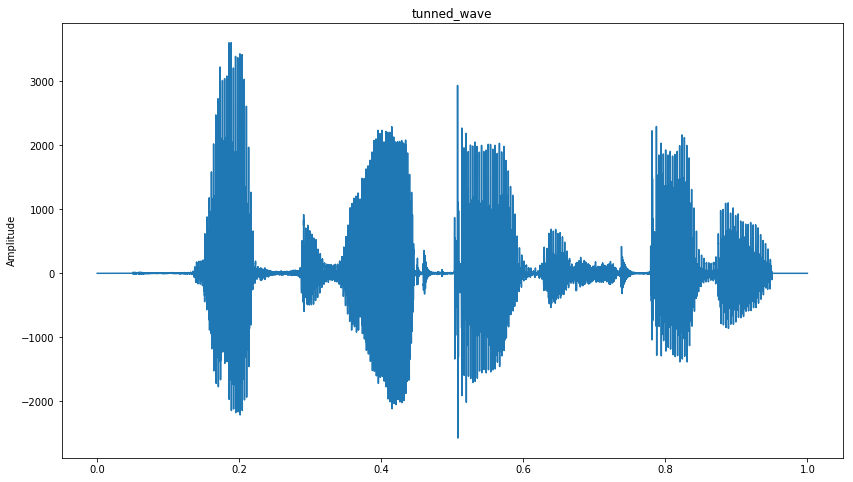


1it [00:00,  6.91it/s]

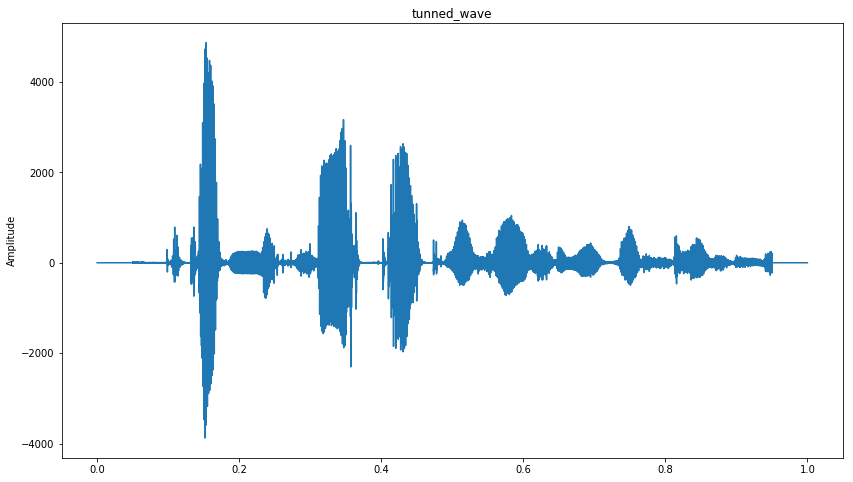


2it [00:00,  6.59it/s]

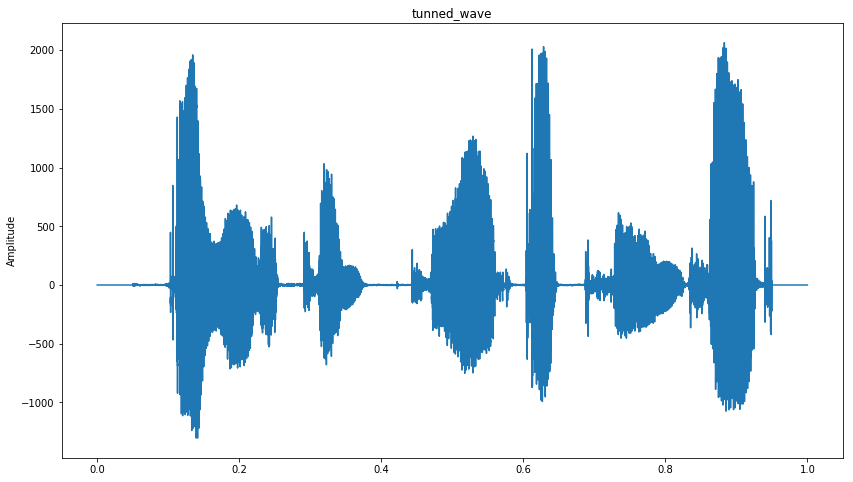


3it [00:00,  6.17it/s]

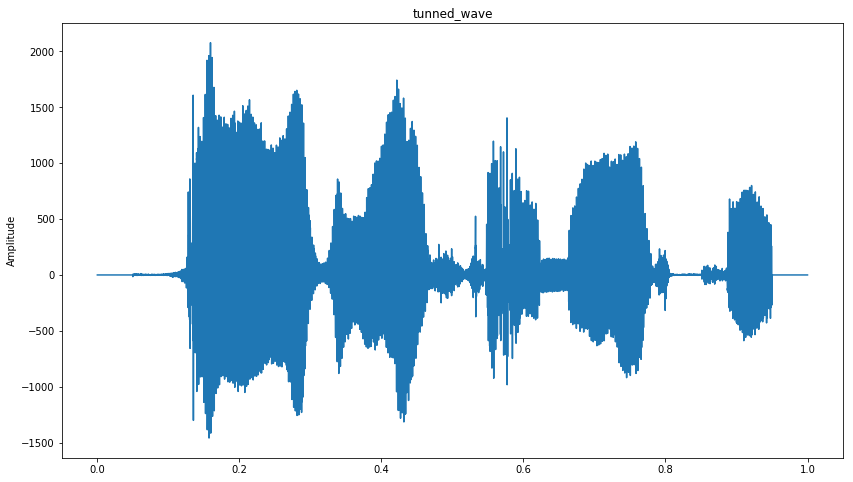


4it [00:00,  5.94it/s]

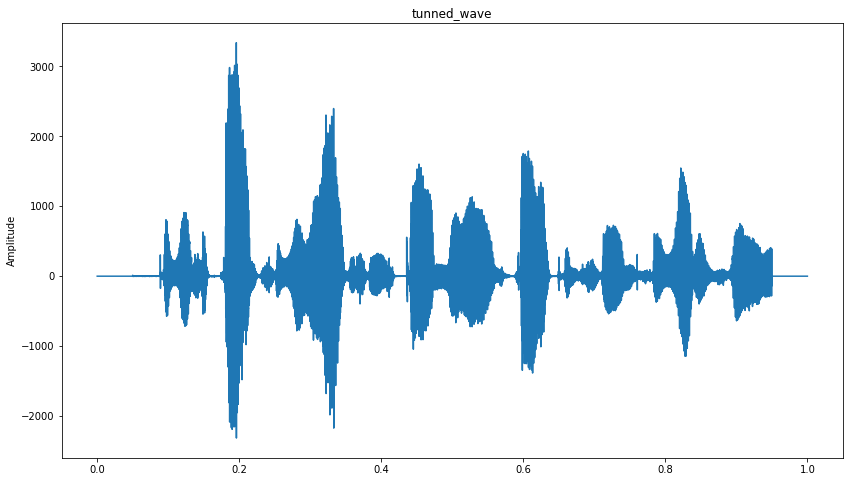


5it [00:00,  5.90it/s]

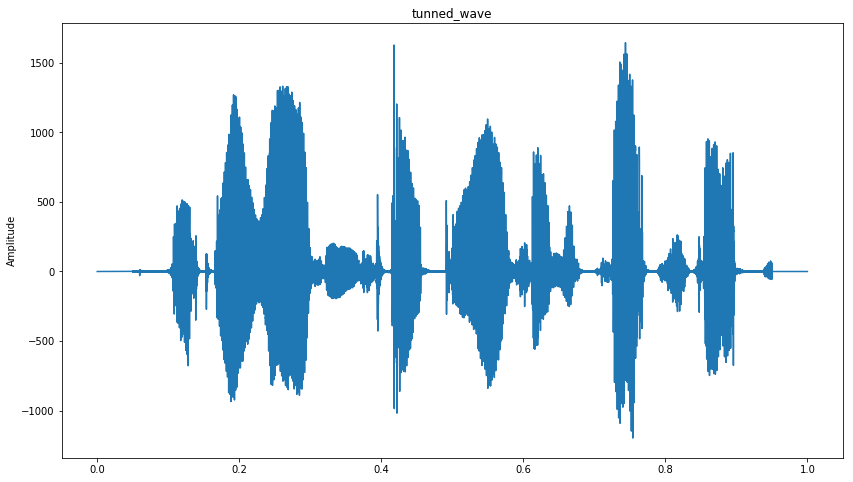


6it [00:01,  5.93it/s]

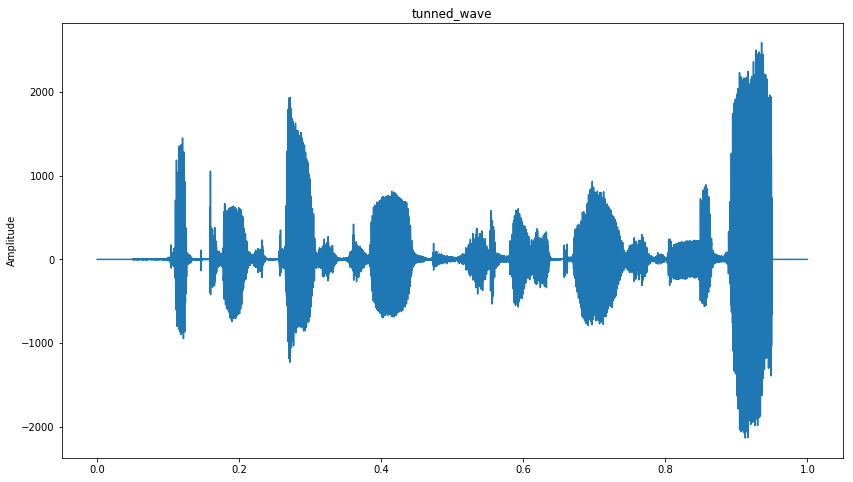


7it [00:01,  6.01it/s]

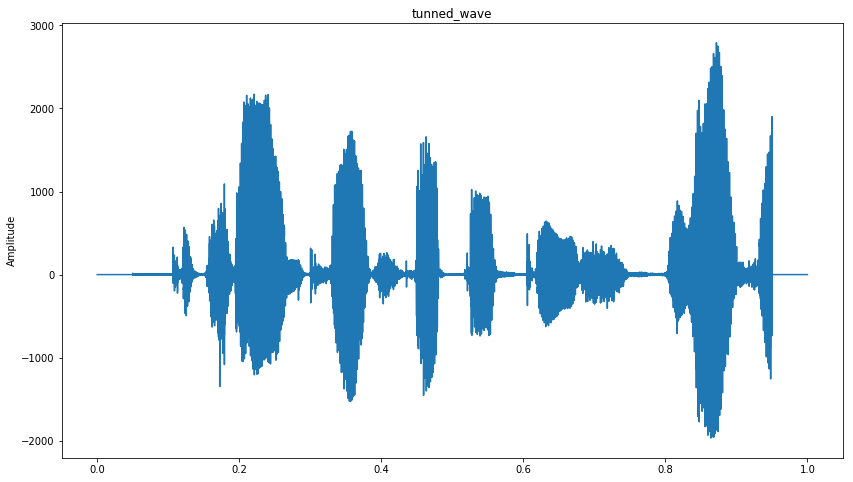


8it [00:01,  5.98it/s]

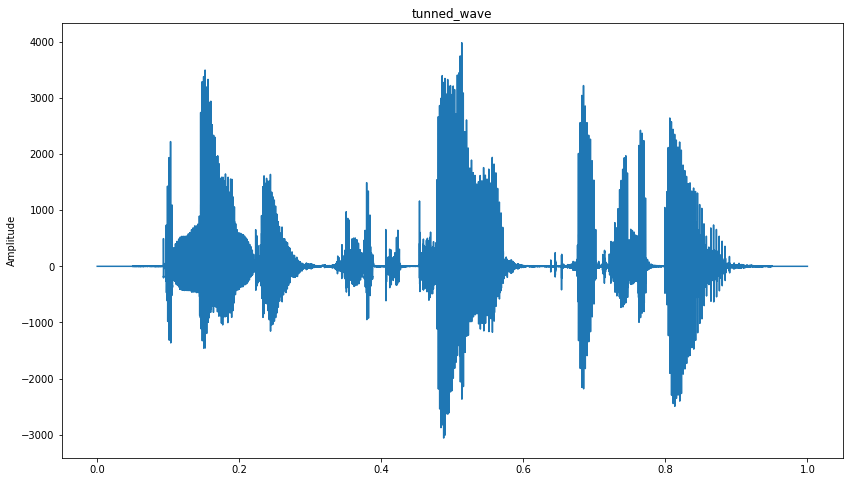


9it [00:01,  6.04it/s]

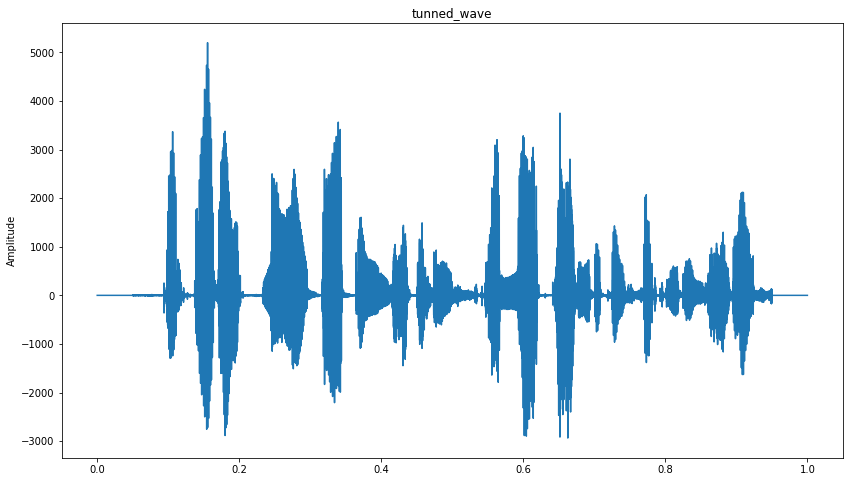


10it [00:01,  5.36it/s]

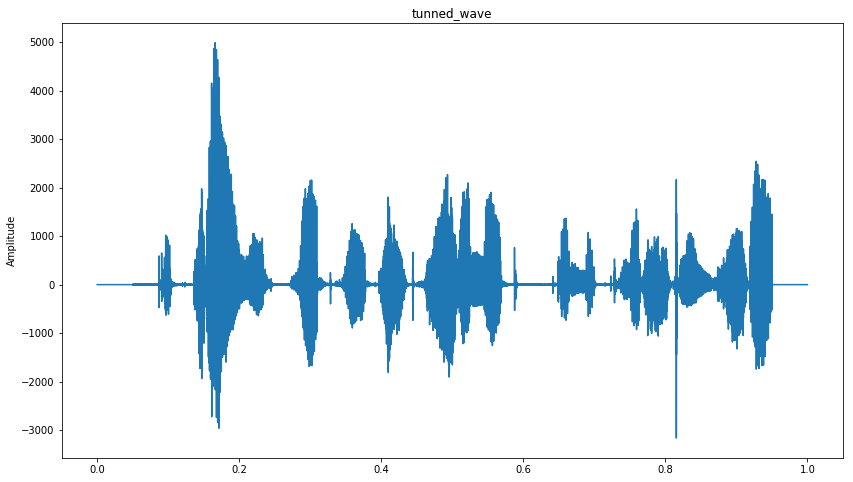


11it [00:01,  5.31it/s]

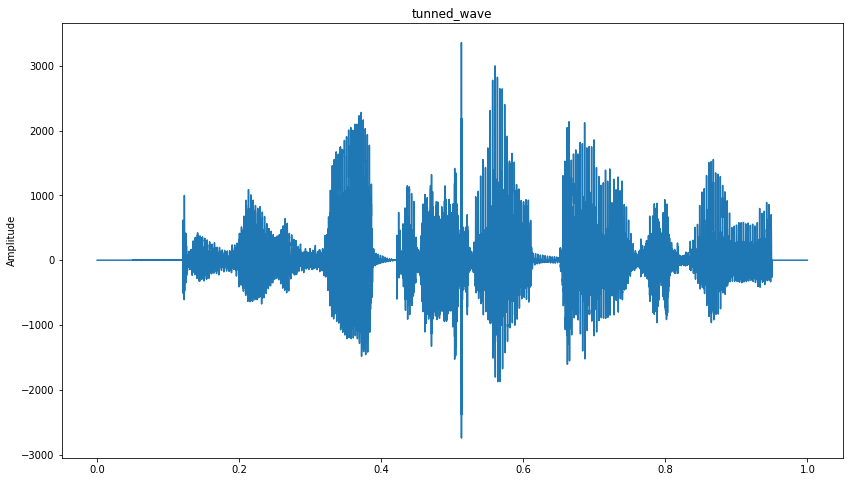


12it [00:02,  4.90it/s]

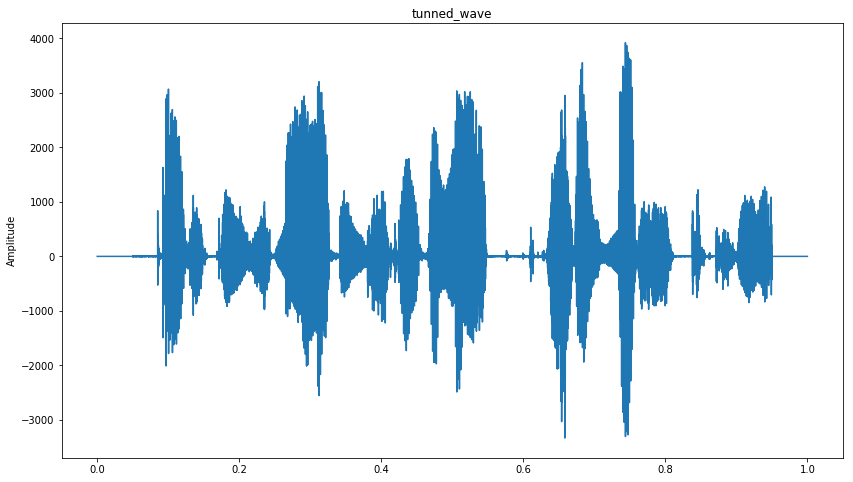


13it [00:02,  4.87it/s]

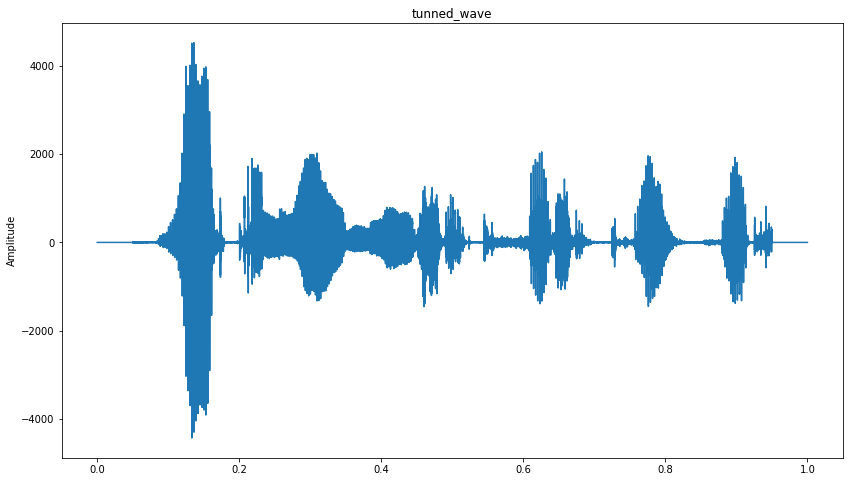


14it [00:02,  5.23it/s]

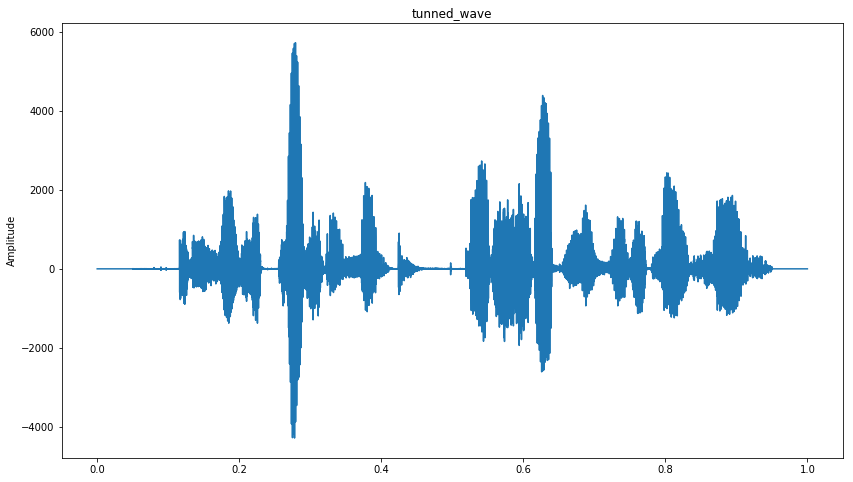


15it [00:02,  5.38it/s]

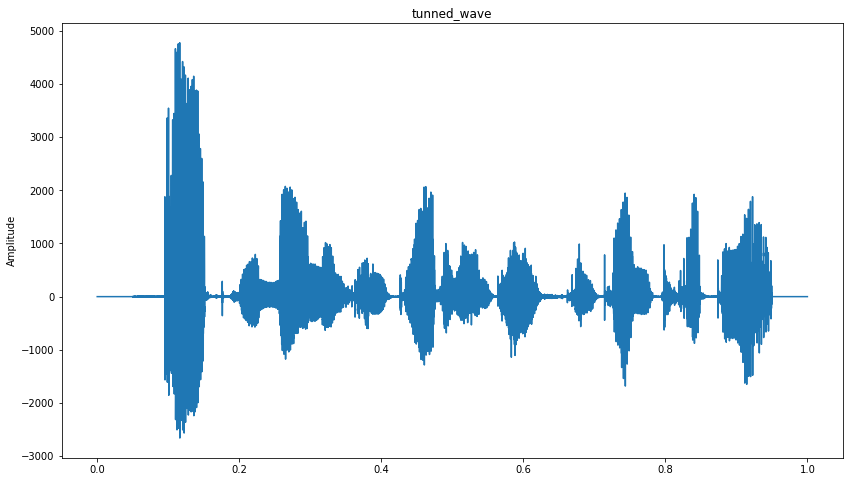


16it [00:02,  5.44it/s]

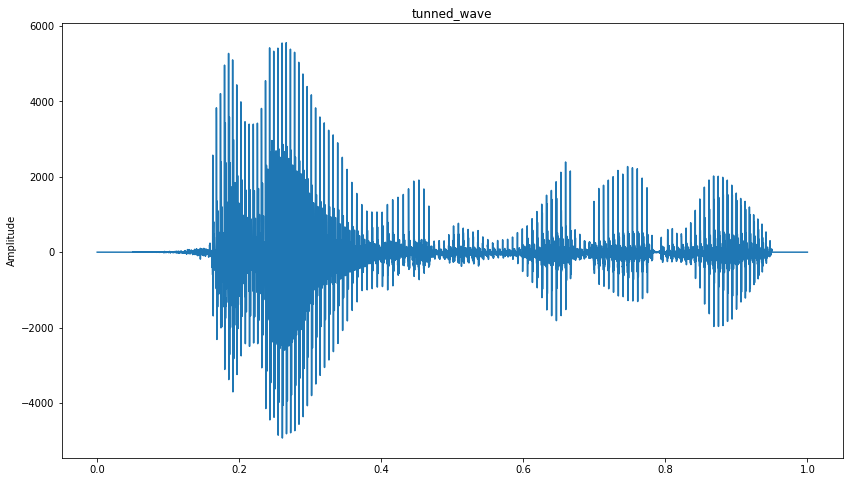


17it [00:03,  5.90it/s]

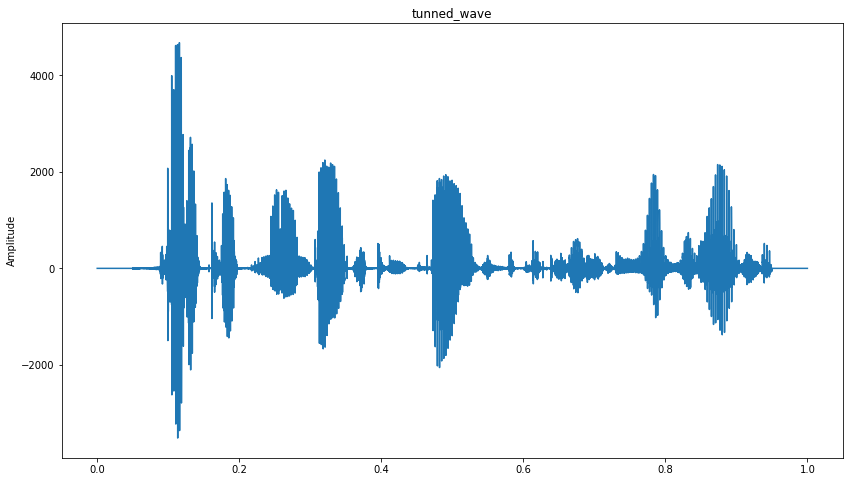


18it [00:03,  6.07it/s]

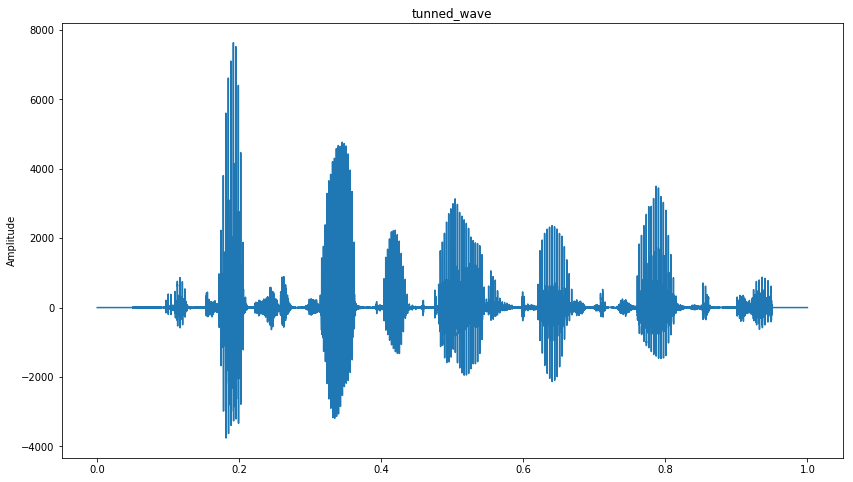


19it [00:03,  6.25it/s]

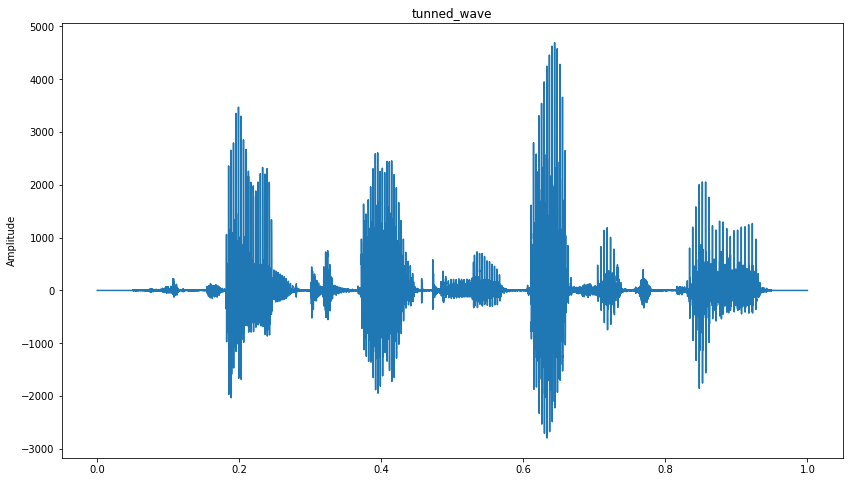


20it [00:03,  6.27it/s]

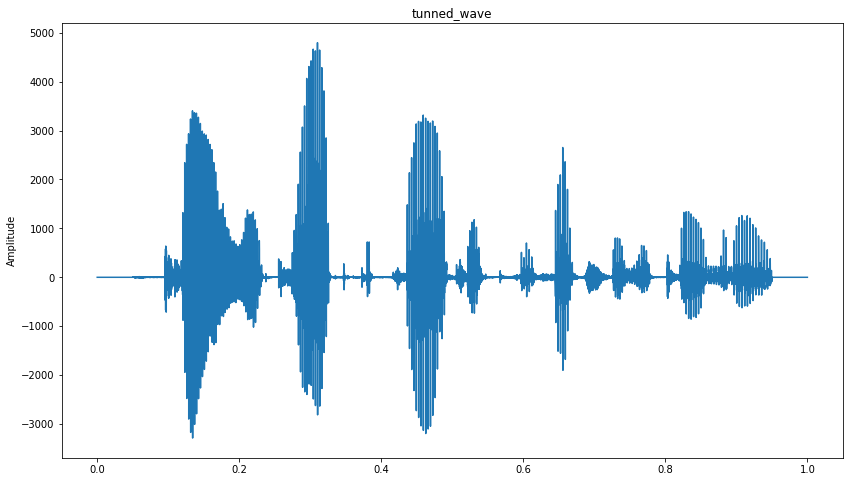


21it [00:03,  6.14it/s]

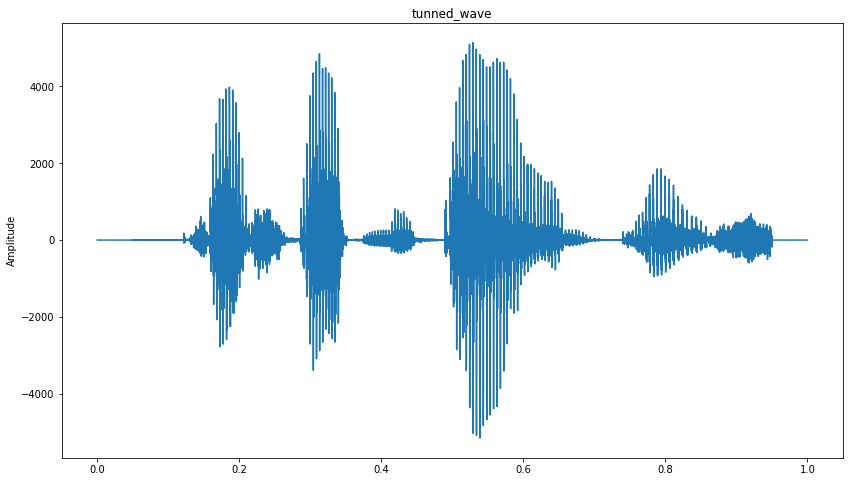


22it [00:03,  6.30it/s]

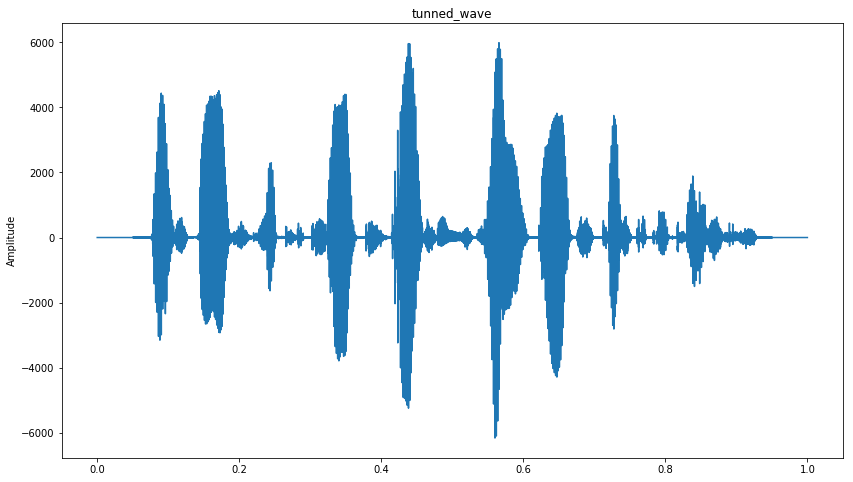


23it [00:04,  5.78it/s]

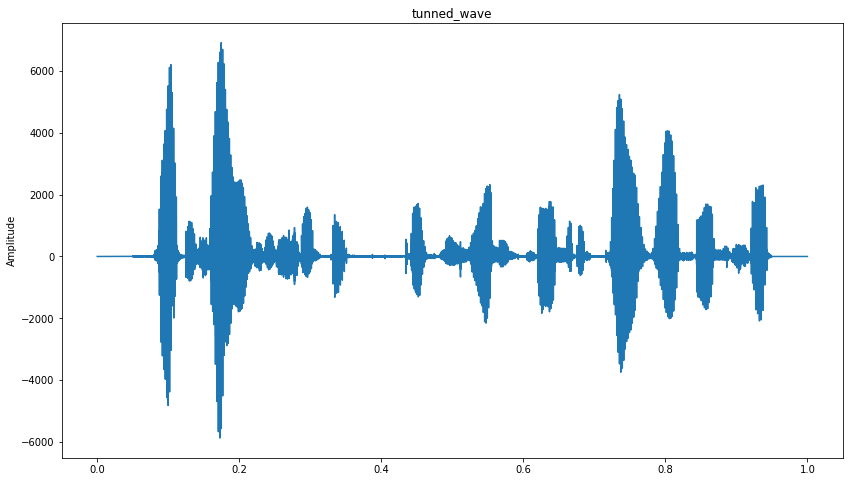


24it [00:04,  5.80it/s]

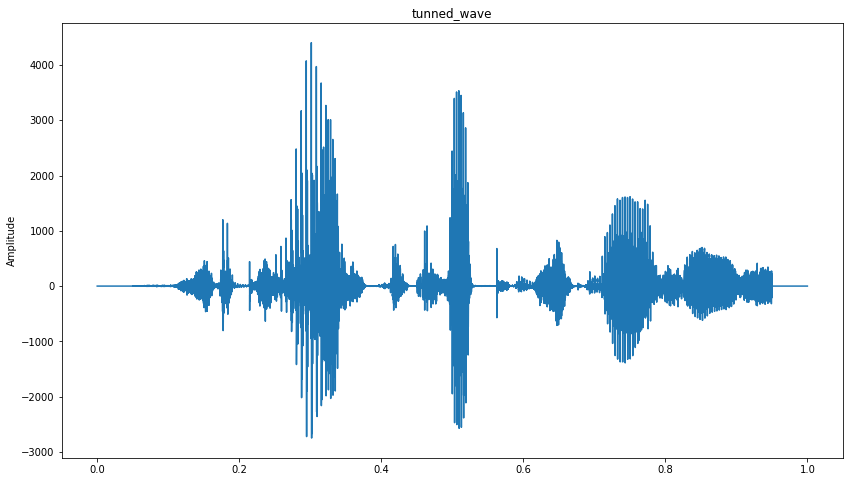


25it [00:04,  6.06it/s]

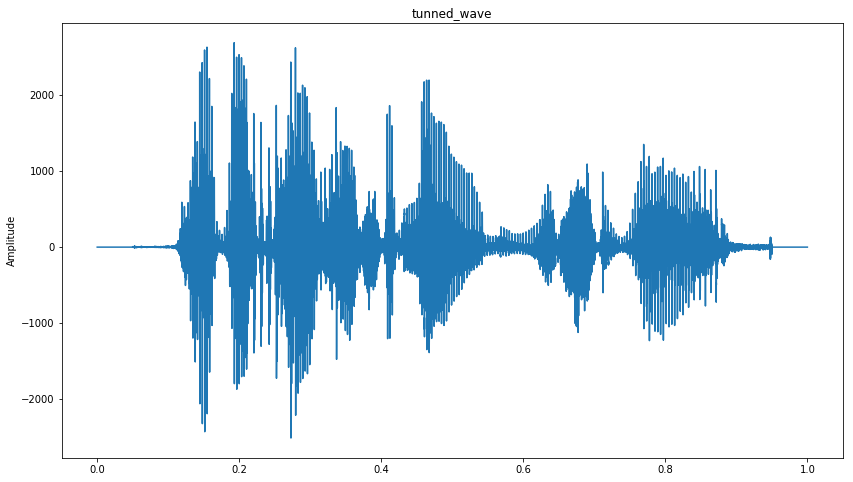


26it [00:04,  6.16it/s]

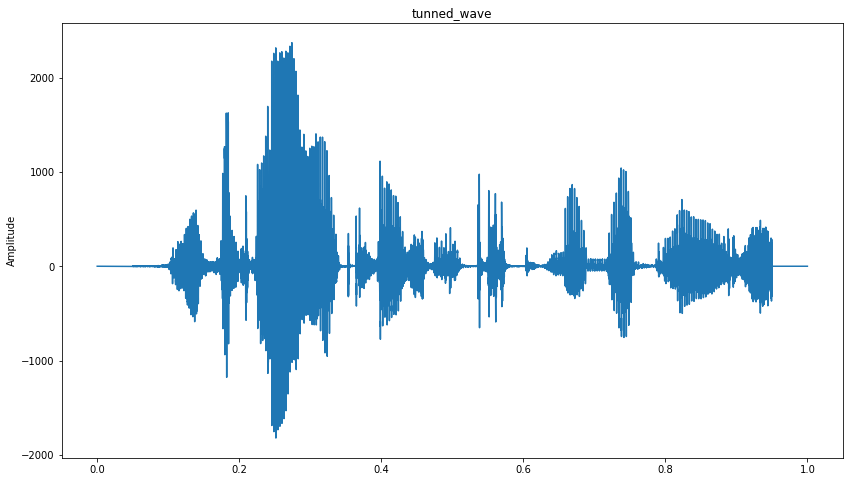


27it [00:04,  6.36it/s]

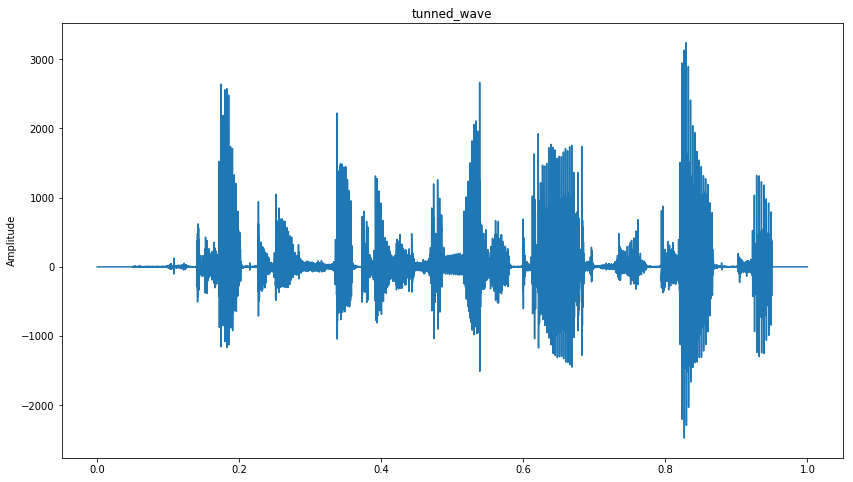


28it [00:04,  6.38it/s]

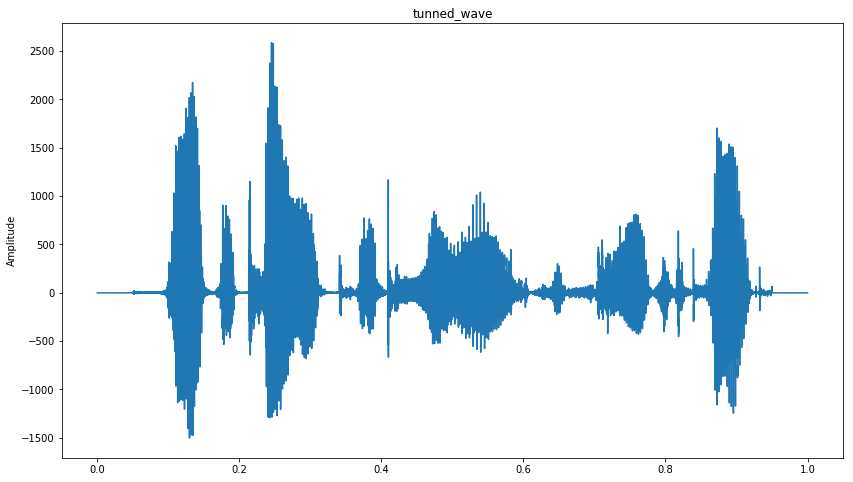


29it [00:04,  6.13it/s]

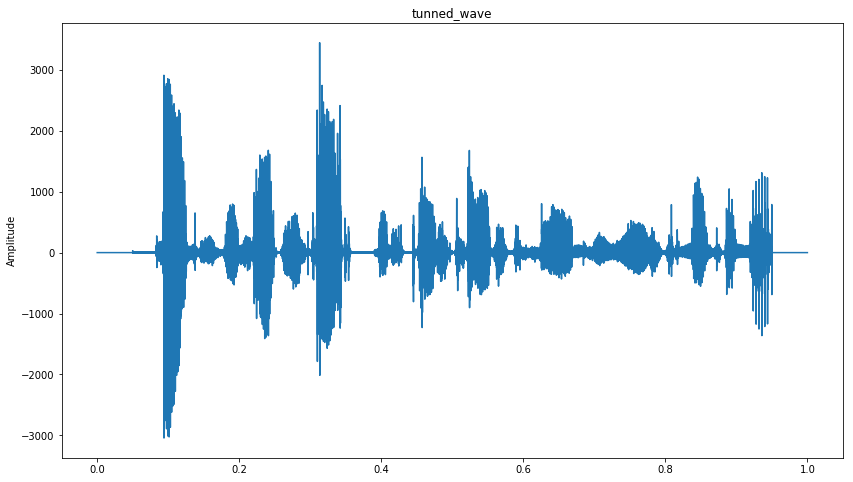


30it [00:05,  5.15it/s]

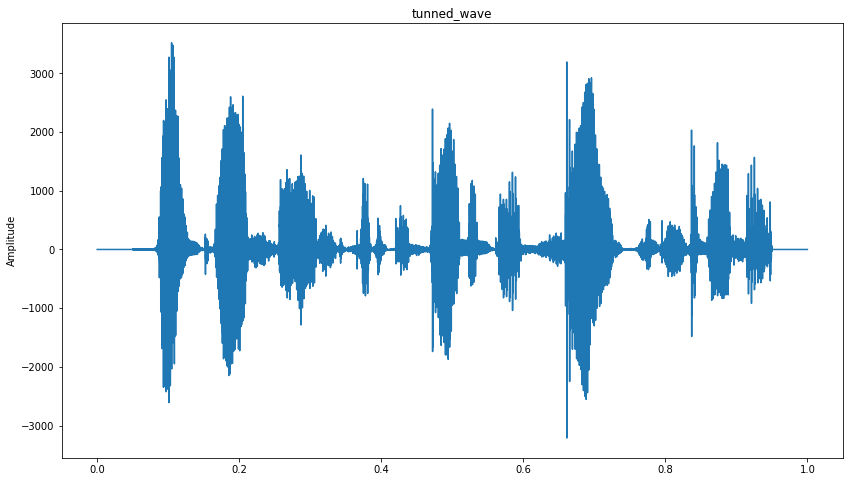


31it [00:05,  5.26it/s]

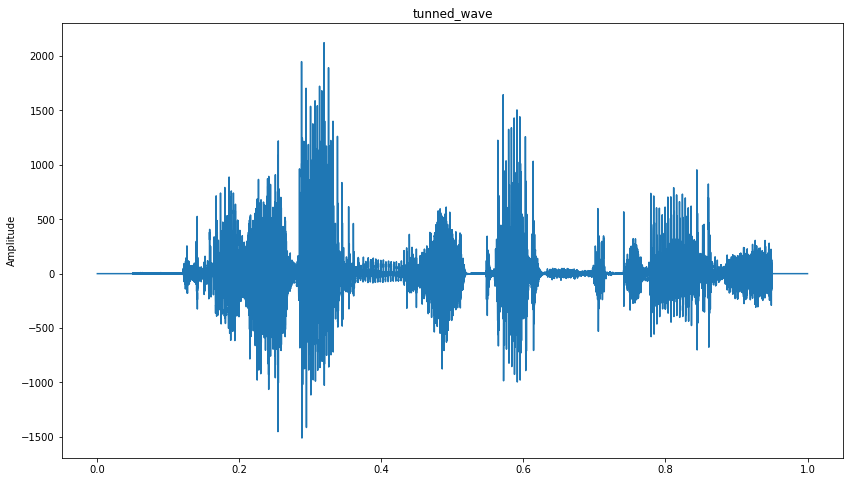


32it [00:05,  5.48it/s]

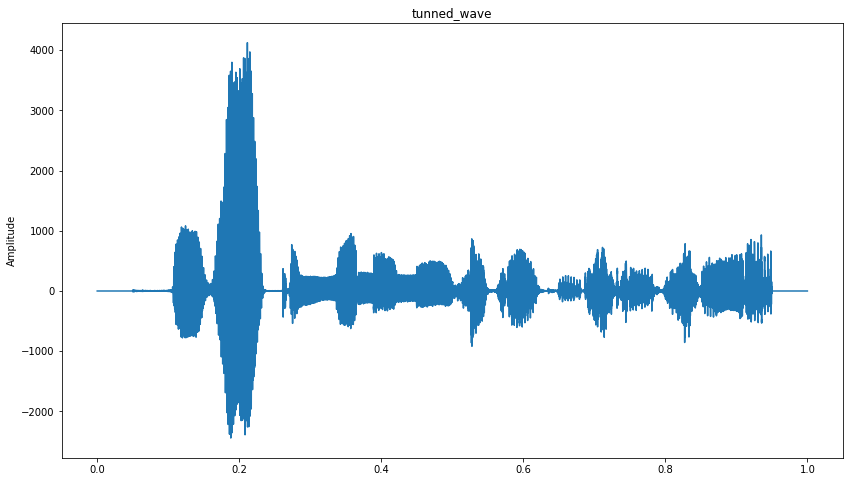


33it [00:05,  5.60it/s]

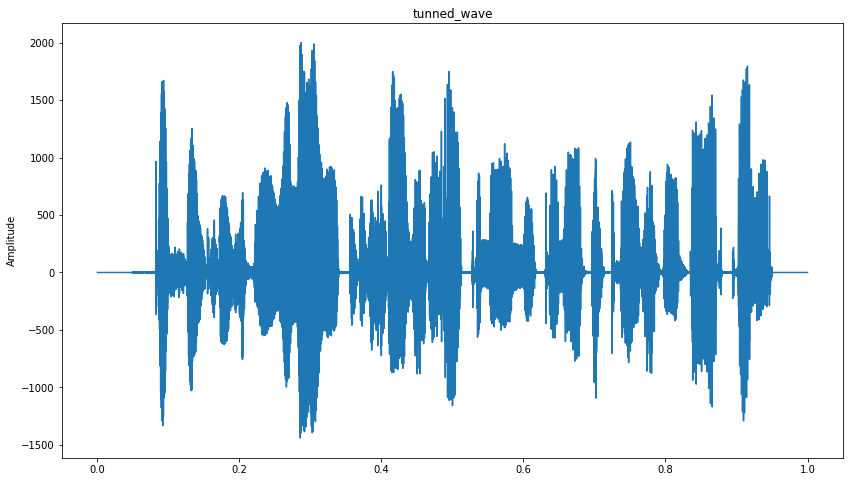


34it [00:06,  4.98it/s]

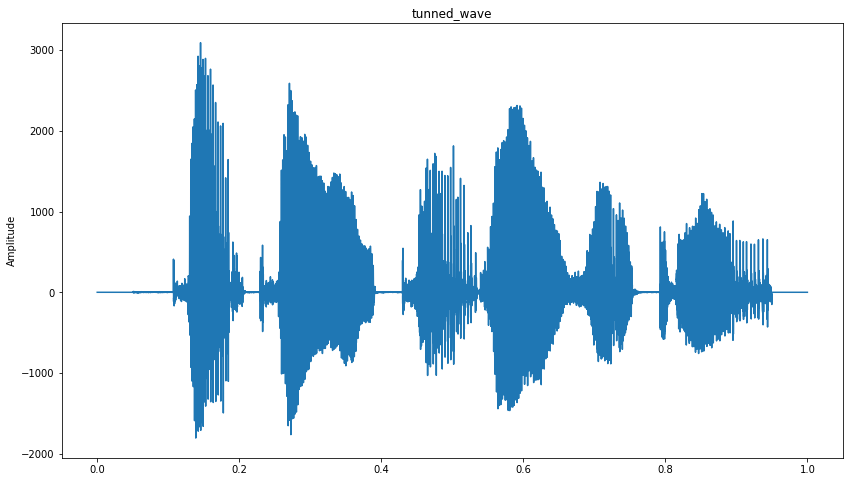


35it [00:06,  5.15it/s]

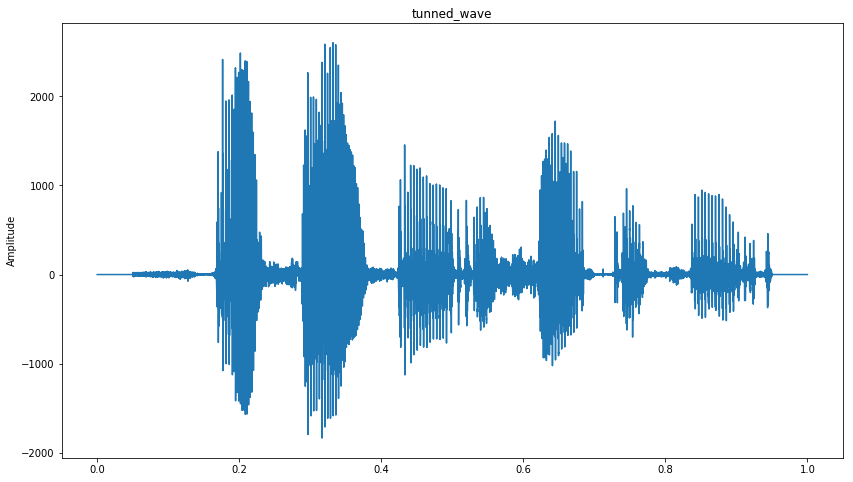


36it [00:06,  5.51it/s]

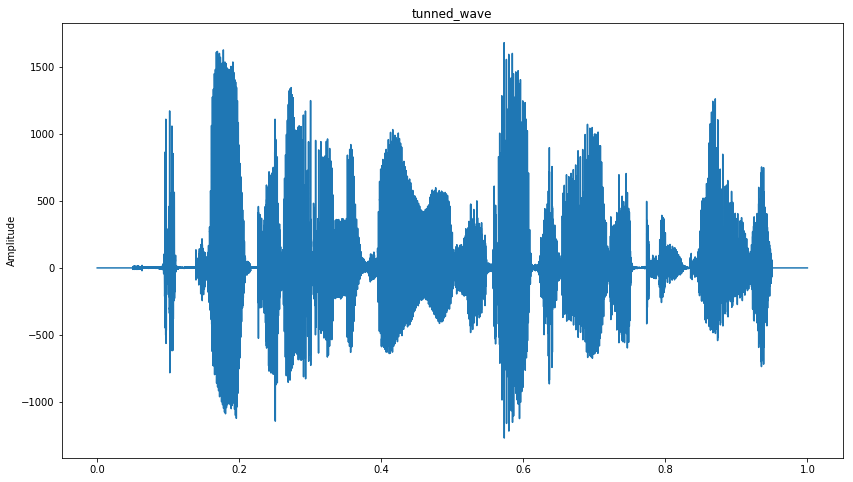


37it [00:06,  5.20it/s]

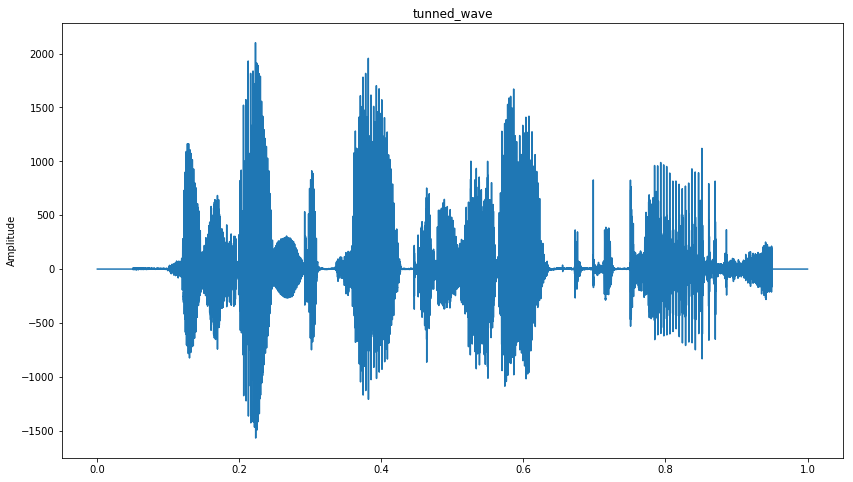


38it [00:06,  5.18it/s]

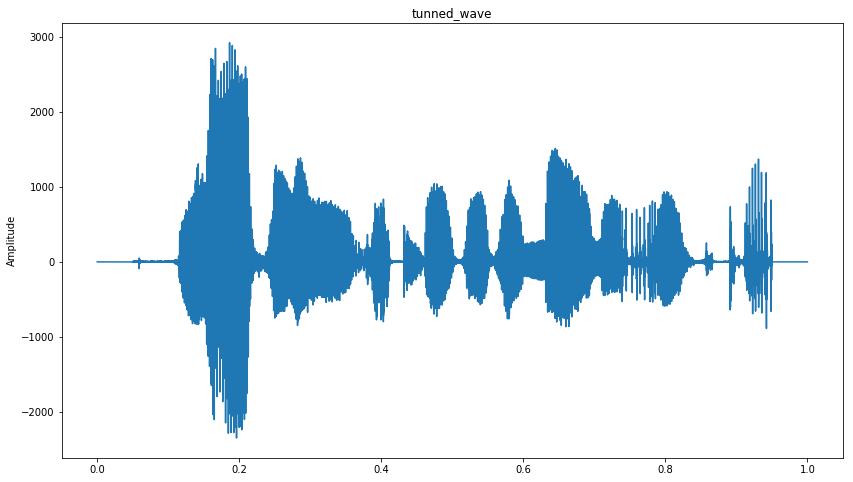


39it [00:06,  5.24it/s]

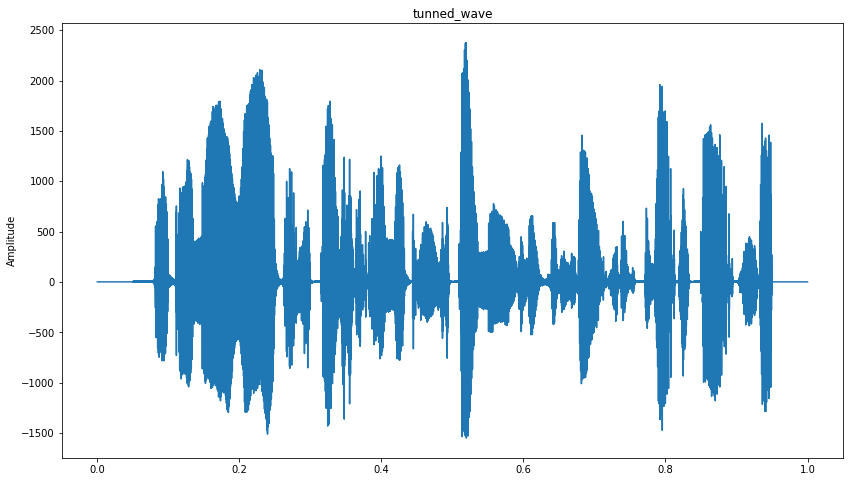


40it [00:07,  4.78it/s]

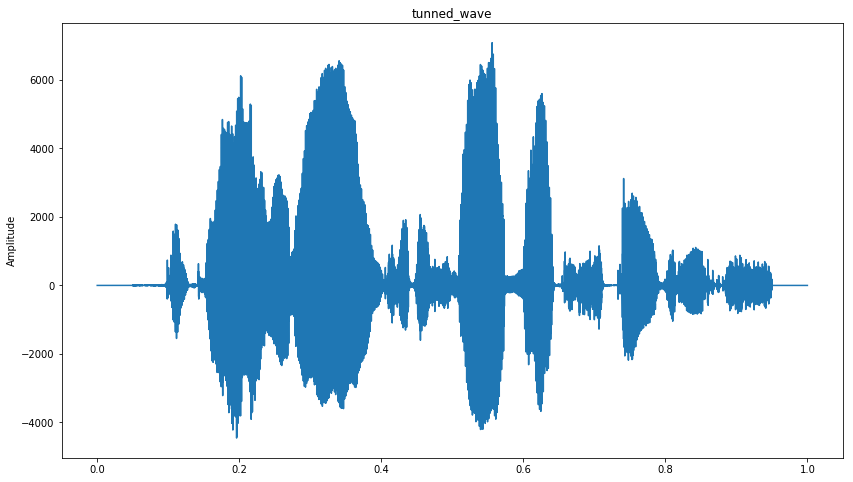


41it [00:07,  4.84it/s]

KeyboardInterrupt: 

In [7]:
def get_wav_file(wav_file):
    signal, sample_rate = snd.read(wav_file, dtype='int16')
    # signal = signal.astype(np.float32)
    return signal, sample_rate

def add_noise(data):
    noise = np.random.randn(len(data))
    noisy_data = data + 0.05*noise
    return noisy_data

def sound_shift(data, shift_value=1600):
    shifted = np.roll(data, shift_value)
    return shifted

def stretch(data, rate=1):
    # data must be given as a float -> data.astype(float)
    stretchen_data = librosa.effects.time_stretch(data, rate)
    return stretchen_data

def plot_signal(data, title, ylab):
    fig = plt.figure(figsize=(14, 8))
    plt.title(title)
    plt.ylabel(ylab)
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()
    
def write_audio(): 
    return 0

def write_augm_csv(): 
    return 0 

def augment_noise(temp_folder, csv_dataFile): 
    # create the noise folder path
    noise_folder = os.path.join(temp_folder, 'data/augmented_data/'+'noise/')
    # make noise_folder directory
    try:
        os.makedirs(os.path.dirname(noise_folder))
    except:
        pass
        
    df = pd.read_csv(csv_dataFile) #read the .csv file as a DataFrame
       
    #iterate over .WAV files in TIMIT dataset
    for row in tqdm(df.itertuples()):
        store_path =  os.path.join(noise_folder, ('//'.join((row.path[1:]).split("/")[-4:-1])))
        print('store_path', store_path)
        
        if not os.path.exists(store_path):
            os.makedirs(store_path)    
            # 1. read signal  
            sample, sample_rate = get_wav_file(os.path.join(root, row.path[1:]))
            print('sample_rate: ', sample_rate, 'type(sample_rate) + type(sample): ', type(sample_rate), type(sample))
            # 2. mix with the noise
            noisy_signal = add_noise(sample)
            # 3. store -> write results
            wave.write(os.path.join(store_path,(row.uttid + '_noisy.WAV')), sample_rate, noisy_signal)
                   
        elif os.path.exists(store_path):
            if ( ((row.path[1:]).split("/")[-2]) == ((row.uttid).split("_")[0])):
                # 1. read signal 
                sample, sample_rate = get_wav_file(os.path.join(root, row.path[1:]))
                print('sample_rate: ', sample_rate, 'type(sample_rate) + type(sample): ', type(sample_rate), type(sample))
                # 2. mix with the noise
                noisy_signal = add_noise(sample)
                # 3. store -> write results
                wave.write(os.path.join(store_path,(row.uttid + '_noisy.WAV')), sample_rate, noisy_signal)   
                
    return noise_folder

def augment_speed(root, temp_folder, all_speeds, csv_dataFile):
    # create the speed folder path
    speed_folder = os.path.join(temp_folder, 'data/augmented_data/'+'speed/')
    # make speed_folder directory
    try:
        os.makedirs(os.path.dirname(speed_folder))
    except:
        pass
        
    df = pd.read_csv(csv_dataFile) #read the .csv file as a DataFrame
   
    # iterate over different speeeds 
    for speed in all_speeds:
        #iterate over .WAV files in TIMIT dataset
        for row in tqdm(df.itertuples()):
            store_path =  os.path.join(speed_folder, ('//'.join((row.path[1:]).split("/")[-4:-1])))
            #print('store_pat: ', store_path)
            if not os.path.exists(store_path):
                os.makedirs(store_path)    
                # 1. read signal  
                sample, sample_rate = get_wav_file(os.path.join(root, row.path[1:]))
                
                # 2. Speed tunning
                wav_speed_tuned = int(np.round(len(sample)*speed))
                wav_speed_tuned = np.resize(sample, (1, int(np.round(wav_speed_tuned))))
                if len(wav_speed_tuned[0]) < len(sample):
                    pad_len = len(sample) - len(wav_speed_tuned[0])
                    tunned_wave = np.r_[np.random.uniform(-0.001,0.001,int(pad_len/2)),
                                           wav_speed_tuned[0],
                                           np.random.uniform(-0.001,0.001,int(np.ceil(pad_len/2)))]
                else:
                    cut_len = len(wav_speed_tuned[0]) - len(sample)
                    tunned_wave = wav_speed_tuned[0][int(cut_len/2):int(cut_len/2)+len(sample)]
            
                plot_signal(tunned_wave, 'tunned_wave', 'Amplitude')
                
                # 3. store -> write results
                wave.write(os.path.join(store_path,(row.uttid + '_speed_%s.WAV' %speed)), sample_rate, tunned_wave)

            elif os.path.exists(store_path):
                if ( ((row.path[1:]).split("/")[-2]) == ((row.uttid).split("_")[0])):
                    # 1. read signal 
                    sample, sample_rate = get_wav_file(os.path.join(root, row.path[1:]))
                    
                    # 2. Speed tunning
                    wav_speed_tuned = int(np.round(len(sample)*speed))
                    wav_speed_tuned = np.resize(sample, (1, int(np.round(wav_speed_tuned))))
                    
                    if len(wav_speed_tuned[0]) < len(sample):
                        pad_len = len(sample) - len(wav_speed_tuned[0])
                        tunned_wave = np.r_[np.random.uniform(-0.001,0.001,int(pad_len/2)),
                                               wav_speed_tuned[0],
                                               np.random.uniform(-0.001,0.001,int(np.ceil(pad_len/2)))]
                    else:
                        cut_len = len(wav_speed_tuned[0]) - len(sample)
                        tunned_wave = wav_speed_tuned[0][int(cut_len/2):int(cut_len/2)+len(sample)]
                    plot_signal(tunned_wave, 'tunned_wave', 'Amplitude')

                    # 3. store -> write results
                    wave.write(os.path.join(store_path,(row.uttid + '_speed_%s.WAV' %speed)), sample_rate, tunned_wave)  

    return speed_folder

def data_collection(root, augm_type, output_filename):
    df = pd.read_csv(os.path.join(root,'description.csv'))
    description_list = []
    columns = ['group', 'uttid', 'modality', 'key', 'augm_path', 'augm_type', 'label48', 'label39', 'phn48', 'phn39']
    
    for dirName, subdirList, fileList in os.walk(os.path.join(root, augm_type)):
        for fname in fileList:
            if fname.endswith('.WAV'):
                file_pathname = (os.path.join(dirName, fname)).replace('\\', '/')
                aaa = '_'.join(fname.split('_')[:2])
                df_match = (df[df['uttid'].str.match('_'.join(fname.split('_')[:2]))])
                                
                row = {}
                row['group'] = df.iloc[df_match.index[0]].group
                row['uttid'] = df.iloc[df_match.index[0]].uttid
                row['modality'] = df.iloc[df_match.index[0]].modality
                row['key'] = df.iloc[df_match.index[0]].key
                row['augm_path'] = '/'.join(file_pathname.split('/')[-7:]) 
                row['augm_type'] = fname.split('_')[-1][:-3]
                row['label48'] = df.iloc[df_match.index[0]].label48
                row['label39'] = df.iloc[df_match.index[0]].label39
                row['phn48'] = df.iloc[df_match.index[0]].phn48
                row['phn39'] = df.iloc[df_match.index[0]].phn39               
                description_list.append(row)
                
    df_new = pd.DataFrame(description_list, columns=columns)

    description_augment_file = os.path.join(root, output_filename)
    df_new.to_csv(description_augment_file, index=False)
    
    
if __name__ == "__main__":
    ##############################################################
    all_speeds = [0.9, 1.0, 1.1]  # speed variations

    temp = 'C:/Users/Martyna Dziadosz/Anaconda3/envs/low-power-asr/low-power-asr-master/'
    csv_dataFile = 'C:/Users/Martyna Dziadosz/Anaconda3/envs/low-power-asr/low-power-asr-master/description.csv'
        
    augm_type = 'data/augmented_data/noise/'
    augm_output = 'description_augment.csv'
    
    speed_type = 'data/augmented_data/speed/'
    speed_output = 'description_speed.csv'
    
    ##############################################################

    # 1. Run augmentation 
    ###     speed augmentation
    root_speed = augment_speed(temp, temp, all_speeds, csv_dataFile)
    ###     noise augmentation
    root_noise = augment_noise(temp, csv_dataFile)
    
    # 2. Collect augmentated data location 
    ###     noise augmentation
    data_collection(temp, augm_type, augm_output)
    ###     speed augmentation
    data_collection(temp, speed_type, speed_output)       